In [1]:
# import dependensy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 30.5+ KB


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
# divide into indepedent and depedent feature
X = df.drop(['FWI'],axis=1)
y = df['FWI']

In [9]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,not fire,0


In [10]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [11]:
X['Classes'] = np.where(X['Classes'].str.contains('not fire'),0,1)

In [12]:
X['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
y_train.shape

(182,)

In [17]:
# correlation 
corr = X_train.corr()

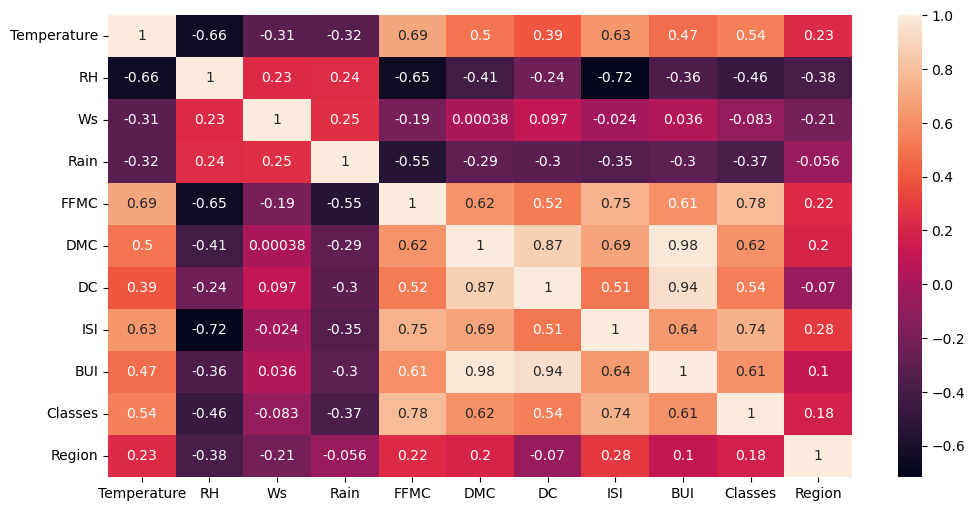

In [18]:
# visuliza the correlation
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)
plt.show()

In [19]:
def correlation(dataset,threshold):
    col_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [20]:
corr_name = correlation(X_train,0.85)

In [21]:
# drp that feature whose corr is mode then 0.85
X_train.drop(corr_name,axis=1,inplace=True)
X_test.drop(corr_name,axis=1,inplace=True)

In [22]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## standerization and feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -1.        ],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.        ],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.        ],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -1.        ],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.        ],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -1.        ]])

## Box plot to understand Strandescaler

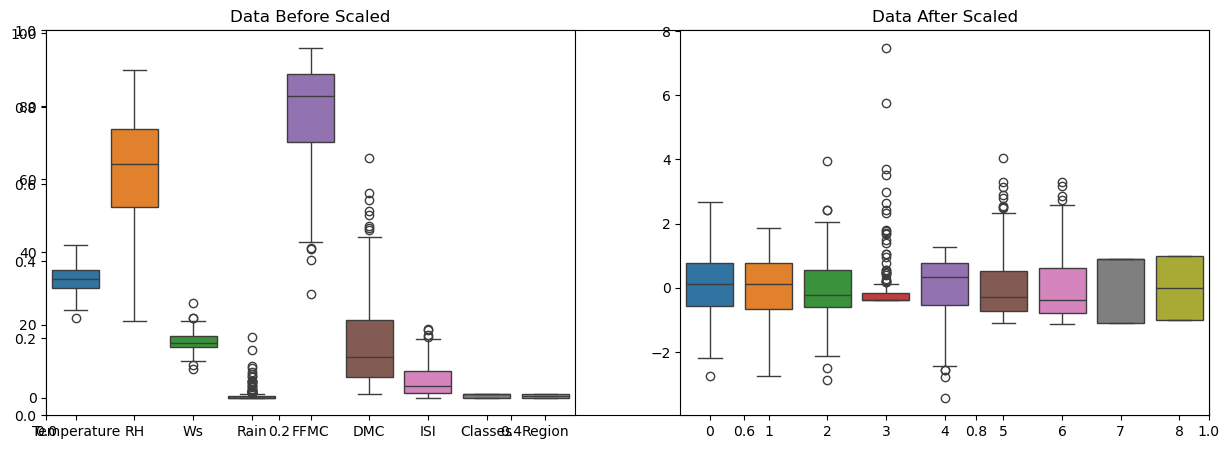

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)

sns.boxplot(data=X_train)
plt.title("Data Before Scaled")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("Data After Scaled")

plt.show()

# Regression Model Training

Mean Absolute error 0.5439176005762609
R2 Score 0.984740746887692


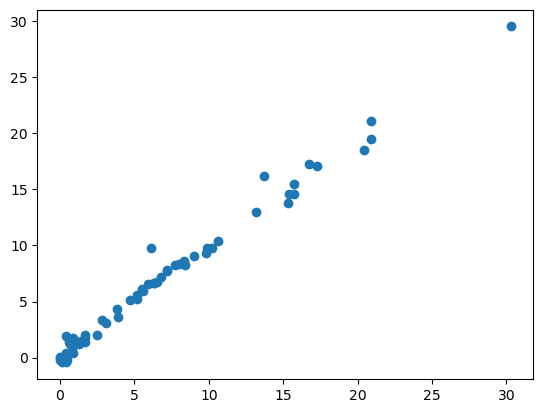

In [27]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)
plt.show()

## Lasso

Mean Absolute error 1.1331759949144085
R2 Score 0.9492020263112388


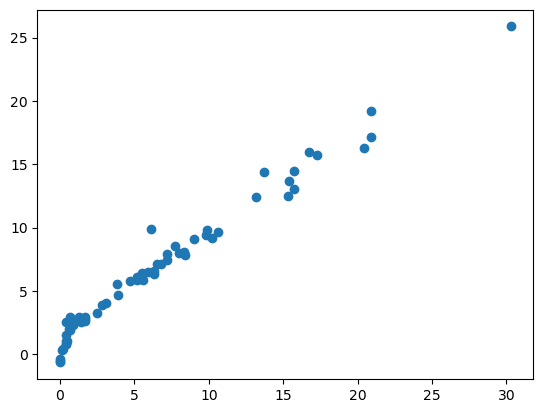

In [28]:
# linear regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)
plt.show()

## lasso cv

In [29]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()

Mean Absolute error 0.6094571825109569
R2 Score 0.9824040596039508


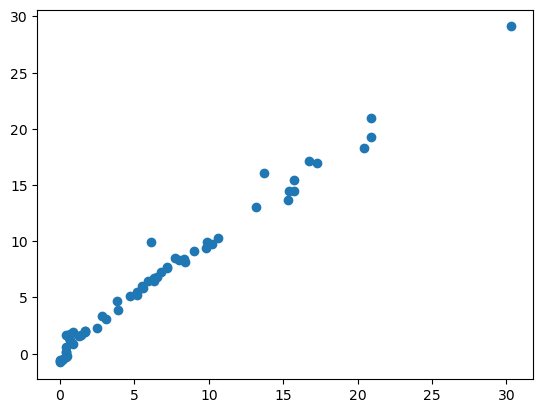

In [30]:
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.show()

In [32]:
lassocv.alpha_

0.053395191056015395

In [33]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

## ridge

Mean Absolute error 0.5606469704293062
R2 Score 0.9842820919540788


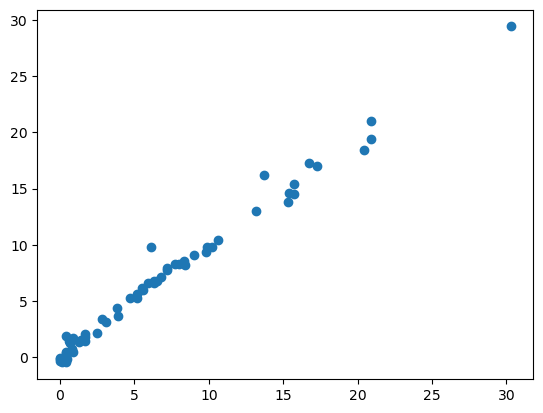

In [35]:
# linear regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)
plt.show()

## ridge cv

Mean Absolute error 0.5606469704298785
R2 Score 0.9842820919540766


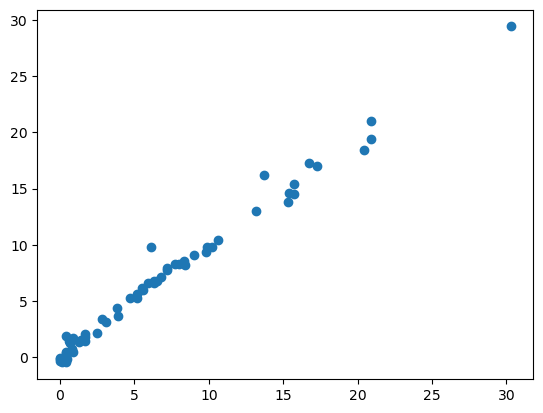

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.show()

In [36]:
ridgecv.alpha_

1.0

In [37]:
ridgecv.best_score_

-2.1989570128722478

In [39]:
ridgecv.get_params

<bound method BaseEstimator.get_params of RidgeCV()>

In [40]:
ridgecv.coef_

array([-0.03308062, -0.20655741,  0.02162444, -0.04706686, -0.80685727,
        3.68372967,  4.74826882,  0.44133084, -0.37553234])

## Elastinet 

Mean Absolute error 1.8822353634896
R2 Score 0.8753460589519703


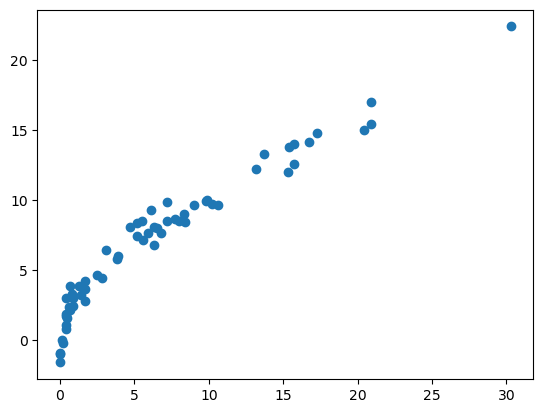

In [41]:
# linear regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastinet = ElasticNet()
elastinet.fit(X_train_scaled,y_train)
y_pred = elastinet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute error 0.6551080369094762
R2 Score 0.9814282806515473


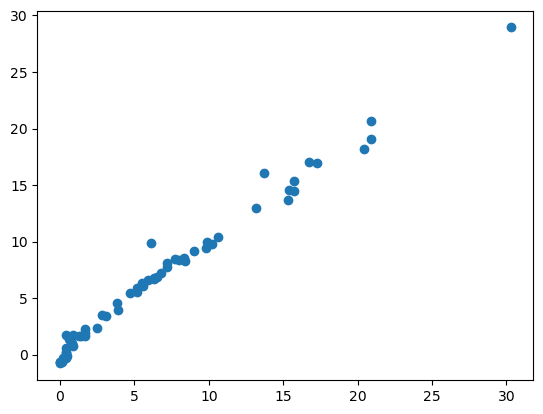

In [45]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.show()

In [46]:
elasticcv.alpha_

0.04311146156383891

In [47]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [48]:
elasticcv.l1_ratio_

0.5